In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# File to Load
file_to_load = "nba_totals.csv"

# Read .csv File and store into Pandas data frame
totals_df = pd.read_csv(file_to_load)
pd.set_option('display.max_columns', None)
totals_df

# totals_df['PPG'] = round(totals_df.PTS / totals_df.GP,1)

# # totals_df= totals_df.groupby('SEASON')['PTS'].apply(lambda grp: grp.nlargest(5).sum())

# # df.groupby('State')['Population'].apply(lambda grp: grp.nlargest(2).sum())

totals_df = totals_df.rename(columns={"3PM": "T_3PM", "3PA": "T_3PA", "3P%": "T_3P%"})
totals_df = totals_df[totals_df.SALARY != "-"]


pd.set_option('display.max_columns', None)
totals_df

# # totals_df['SEASON'] = totals_df['SEASON'].astype('string')
# # totals_df.dtypes

# Convert to json
totals_df.to_json(r'Plotly\data\nba.json',orient='records')

AttributeError: 'DataFrame' object has no attribute 'SALARY'

In [5]:
scoring_df = totals_df[['ERA','SEASON','PLAYER','GP','FGM','FG%','T_3PM','T_3P%','FTM','FT%']]
scoring_df['FG-3P-FT PTS'] = ((scoring_df.FGM*2)+(scoring_df.T_3PM *3)+(scoring_df.FTM*1))
# scoring_df['FG_PTS']
# scoring_df = scoring_df[scoring_df['GP'] > 60]
scoring_df

# conditional filter example dataframe['column_name']== value


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ERA   SEASON                  PLAYER  GP  FGM   FG%  T_3PM  T_3P%  \
0      1985-89  1984-85          Michael Jordan  82  837  51.5      9   17.3   
1      1985-89  1984-85              Larry Bird  80  918  52.2     56   42.7   
2      1985-89  1984-85            Alex English  81  939  51.8      1   20.0   
3      1985-89  1984-85       Dominique Wilkins  81  853  45.1     25   30.9   
4      1985-89  1984-85            Purvis Short  78  819  46.0     47   31.3   
...        ...      ...                     ...  ..  ...   ...    ...    ...   
15544     2020  2019-20  Quinndary Weatherspoon   3    0   0.0      0    0.0   
15545     2020  2019-20            Stanton Kidd   4    0   0.0      0    0.0   
15546     2020  2019-20     Talen Horton-Tucker   2    0   0.0      0    0.0   
15547     2020  2019-20                 Vic Law   5    0   0.0      0    0.0   
15548     2020  2019-20          William Howard   2    0   0.0      0    0.0   

       FTM   FT%  FG-3P-FT PTS  
0      630  84.5          2331  
1      403  88.2          2407  
2      383  82.9          2264  
3      486  80.6          2267  
4      501  81.7          2280  
...    ...   ...           ...  
15544    0   0.0             0  
15545    0   0.0             0  
15546    0   0.0             0  
15547    0   0.0             0  
15548    0   0.0             0  

[15549 rows x 11 columns]

In [6]:
# Filter by Season
season_df = scoring_df.loc[scoring_df['SEASON'] == '1990-91']
season_df

ERA   SEASON          PLAYER  GP  FGM   FG%  T_3PM  T_3P%  FTM  \
2024  1990-94  1990-91  Michael Jordan  82  990  53.9     29   31.2  571   
2025  1990-94  1990-91     Karl Malone  82  847  52.7      4   28.6  684   
2026  1990-94  1990-91   Patrick Ewing  81  845  51.4      0    0.0  464   
2027  1990-94  1990-91    Chris Mullin  82  777  53.6     40   30.1  513   
2028  1990-94  1990-91  David Robinson  82  754  55.2      1   14.3  592   
...       ...      ...             ...  ..  ...   ...    ...    ...  ...   
2405  1990-94  1990-91     Robert Reid   3    2  14.3      0    0.0    0   
2406  1990-94  1990-91     Bart Kofoed   5    0   0.0      0    0.0    3   
2407  1990-94  1990-91    Gary Leonard   4    0   0.0      0    0.0    2   
2408  1990-94  1990-91      Jim Thomas   3    1  25.0      0    0.0    0   
2409  1990-94  1990-91   Mark McNamara   2    0   0.0      0    0.0    0   

       FT%  FG-3P-FT PTS  
2024  85.1          2638  
2025  77.0          2390  
2026  74.5          2154  
2027  88.4          2187  
2028  76.2          2103  
...    ...           ...  
2405   0.0             4  
2406  50.0             3  
2407  50.0             2  
2408   0.0             2  
2409   0.0             0  

[386 rows x 11 columns]

In [5]:
# Select Top and Bottom PTS scored per game
top = season_df.nlargest(50,'PTS', keep='all')
top
bottom = season_df.nsmallest(50,'PTS')
bottom
​
frames = [top,bottom]
top_bottom_df = pd.concat(frames)
top_bottom_df
​
# top_bottom= [(season_df.nlargest(50,'PTS',keep='all')) | (season_df.nsmallest(50,'PTS'))]
# NOT WORKING WHEN COMBINED WITH OR STATEMENT
​
# df.nlargest(#, 'column_name',keep ='all')
#     keep = 'all' keeps duplicate values
    
#  df[(df.column_name >= 200) | (df.column_name == 'Value')]
#     | = OR

SyntaxError: invalid character in identifier (<ipython-input-5-b4c48ef94592>, line 6)

In [6]:
# # conditional filter example: dataframe['column_name']== value

# # totals_df= totals_df.groupby('SEASON')['PTS'].apply(lambda grp: grp.nlargest(5).sum())

# # df.groupby('State')['Population'].apply(lambda grp: grp.nlargest(2).sum())



In [4]:
# File to Load
file_to_load = "nba_totals.csv"

# Read .csv File and store into Pandas data frame
nba_df = pd.read_csv(file_to_load)
# nba_df

# rename columns that begin with 3
nba_df = nba_df.rename(columns={"3PM": "T_3PM", "3PA": "T_3PA", "3P%": "T_3P%"})
# nba_df

# Filter by Player
mj_df = nba_df.loc[nba_df['PLAYER'] == 'Michael Jordan']
mj_df

league = nba_df[(nba_df.GP >=58)]
league

# LEADER MINIMUMS
# SCORING:	Player must play 70% of his team's games (58 in 82-game season)*
# REBOUNDS:	Player must play 70% of his team's games (58 in 82-game season)*
# FIELD GOAL %:	300 field goals made
# FREE THROW %:	125 free throws made
# 3PT %:	82 three-point field goals made
# ASSISTS:	Player must play 70% of his team's games (58 in 82-game season)*
# STEALS:	Player must play 70% of his team's games (58 in 82-game season)*
# BLOCKED SHOTS:	Player must play 70% of his team's games (58 in 82-game season)*
# MINUTES:	Player must play 70% of his team's games (58 in 82-game season)*
# AST/TO RATIO:	200 assists
# STL/TO RATIO:	82 steals

# leaders = nba_df[(nba_df.GP >=58) & (nba_df.FGM >=300) & (nba_df.FTM >= 125) & (nba_df.T_3PM >= 82) & 
#                  (nba_df.AST >= 200) & (nba_df.STL >=82)]
# leaders

# # At Least 25% above leader minimums
# best = nba_df[(nba_df.GP >=58) & (nba_df.FGM >=375) & (nba_df.FTM >= 157) & (nba_df.T_3PM >= 103) & 
#                  (nba_df.AST >= 250) & (nba_df.STL >=103)]
# best

# movies[(movies.duration >= 200) & (movies.genre == 'Drama')]

# # conditional filter example dataframe['column_name']== value

# # totals_df= totals_df.groupby('SEASON')['PTS'].apply(lambda grp: grp.nlargest(5).sum())

# # df.groupby('State')['Population'].apply(lambda grp: grp.nlargest(2).sum())

# totals_df = totals_df.rename(columns={"3PM": "T_3PM", "3PA": "T_3PA", "3P%": "T_3P%"})


SEASON      ERA    #              Season/Player             PLAYER  \
0      1984-85  1985-89    1     1984-85-Michael Jordan     Michael Jordan   
1      1984-85  1985-89    2         1984-85-Larry Bird         Larry Bird   
2      1984-85  1985-89    3       1984-85-Alex English       Alex English   
3      1984-85  1985-89    4  1984-85-Dominique Wilkins  Dominique Wilkins   
4      1984-85  1985-89    5       1984-85-Purvis Short       Purvis Short   
...        ...      ...  ...                        ...                ...   
15308  2019-20     2020  274         2019-20|Thon Maker         Thon Maker   
15314  2019-20     2020  280        2019-20|Isaac Bonga        Isaac Bonga   
15316  2019-20     2020  282   2019-20|Ryan Arcidiacono   Ryan Arcidiacono   
15344  2019-20     2020  309     2019-20|Grant Williams     Grant Williams   
15359  2019-20     2020  325       2019-20|Semi Ojeleye       Semi Ojeleye   

       GP   MIN   PTS  FGM   FGA  ...  AST  STL  BLK  TOV   PF   EFF  AST/TOV  \
0      82  3144  2313  837  1625  ...  481  196   69  291  285  2398     1.65   
1      80  3161  2295  918  1760  ...  531  129   98  248  208  2751     2.14   
2      81  2924  2262  939  1812  ...  344  101   46  251  259  2008     1.37   
3      81  3023  2217  853  1891  ...  200  135   54  225  170  1783     0.89   
4      78  3081  2186  819  1780  ...  234  116   27  241  255  1647     0.97   
...    ..   ...   ...  ...   ...  ...  ...  ...  ...  ...  ...   ...      ...   
15308  60   776   281   93   193  ...   43   25   39   45  102   373     0.96   
15314  58  1026   266   96   184  ...   61   37   21   41  136   427     1.49   
15316  58   930   261   90   220  ...   96   27    3   37   96   319     2.60   
15344  62   970   218   80   192  ...   62   28   33   46  149   334     1.35   
15359  61   891   191   65   159  ...   31   18    5   12   63   260     2.58   

       STL/TOV   SALARY  PERFORMANCE  
0         0.67        -     Standard  
1         0.52        -     Standard  
2         0.40        -     Standard  
3         0.60        -     Standard  
4         0.48        -     Standard  
...        ...      ...          ...  
15308     0.56  3569643     Standard  
15314     0.90  1416852     Standard  
15316     0.73  3000000     Standard  
15344     0.61  2379840     Standard  
15359     1.50  1618520     Standard  

[8441 rows x 30 columns]

In [10]:
# Mean and Median of seasonal stats per player within the entire league
league_avg=round(league.groupby('SEASON').mean())
league_avg= league_avg.reset_index()
pd.set_option('display.max_columns', None)
league_avg

league_med=league.groupby('SEASON').median()
league_med= league_avg.reset_index()
pd.set_option('display.max_columns', None)
league_med


# # player avg per season
# player_avg = round(league.groupby('PLAYER').mean())
# player_avg

# mvps= ['']

# leader_avg = round(leaders.groupby('SEASON').mean())
# leader_avg= leader_avg.reset_index()

# best_avg = round(best.groupby('SEASON').mean())
# best_avg= best_avg.reset_index()
# best_avg
# # Filter by Season
# season_avg = avg.loc[avg['SEASON'] == '1990-91']
# season_avg
# Filter by Season
# season_df = scoring_df.loc[scoring_df['SEASON'] == '1990-91']

index   SEASON      #    GP     MIN    PTS    FGM    FGA   FG%  T_3PM  \
0       0  1984-85  115.0  75.0  1917.0  884.0  350.0  709.0  49.0    7.0   
1       1  1985-86  112.0  76.0  1935.0  894.0  351.0  714.0  49.0    8.0   
2       2  1986-87  117.0  74.0  1882.0  865.0  335.0  692.0  48.0   11.0   
3       3  1987-88  111.0  75.0  1934.0  881.0  343.0  708.0  48.0   12.0   
4       4  1988-89  119.0  75.0  1957.0  903.0  351.0  730.0  47.0   18.0   
5       5  1989-90  130.0  76.0  1966.0  882.0  342.0  712.0  47.0   18.0   
6       6  1990-91  131.0  75.0  1949.0  863.0  336.0  704.0  47.0   18.0   
7       7  1991-92  127.0  76.0  1997.0  880.0  345.0  725.0  47.0   21.0   
8       8  1992-93  132.0  75.0  1942.0  849.0  328.0  690.0  47.0   25.0   
9       9  1993-94  126.0  75.0  1974.0  845.0  328.0  700.0  47.0   28.0   
10     10  1994-95  128.0  74.0  1948.0  831.0  311.0  663.0  47.0   46.0   
11     11  1995-96  141.0  74.0  1939.0  808.0  301.0  647.0  46.0   48.0   
12     12  1996-97  135.0  74.0  1997.0  814.0  303.0  661.0  46.0   52.0   
13     13  1997-98  137.0  74.0  1968.0  791.0  297.0  655.0  45.0   37.0   
14     14  1999-00  134.0  75.0  1969.0  815.0  308.0  680.0  45.0   40.0   
15     15  2000-01  132.0  74.0  1980.0  805.0  302.0  675.0  45.0   42.0   
16     16  2001-02  137.0  73.0  1948.0  788.0  297.0  663.0  45.0   44.0   
17     17  2002-03  137.0  75.0  1976.0  792.0  297.0  667.0  44.0   44.0   
18     18  2003-04  136.0  74.0  1965.0  774.0  290.0  654.0  44.0   43.0   
19     19  2004-05  146.0  73.0  1894.0  780.0  288.0  639.0  45.0   46.0   
20     20  2005-06  141.0  74.0  1979.0  809.0  298.0  652.0  45.0   49.0   
21     21  2006-07  148.0  73.0  1912.0  785.0  291.0  631.0  46.0   48.0   
22     22  2007-08  140.0  74.0  1967.0  834.0  310.0  673.0  46.0   55.0   
23     23  2008-09  143.0  74.0  1954.0  821.0  304.0  659.0  46.0   56.0   
24     24  2009-10  137.0  74.0  1968.0  839.0  315.0  678.0  46.0   53.0   
25     25  2010-11  140.0  73.0  1928.0  820.0  305.0  662.0  46.0   53.0   
26     26  2011-12  121.0  63.0  1675.0  690.0  263.0  575.0  46.0   42.0   
27     27  2012-13  145.0  73.0  1868.0  780.0  295.0  644.0  46.0   56.0   
28     28  2013-14  143.0  73.0  1902.0  815.0  303.0  663.0  46.0   62.0   
29     29  2014-15  147.0  72.0  1823.0  769.0  289.0  635.0  46.0   59.0   
30     30  2015-16  150.0  73.0  1826.0  787.0  293.0  644.0  46.0   66.0   
31     31  2016-17  148.0  73.0  1825.0  817.0  301.0  655.0  46.0   75.0   
32     32  2017-18  149.0  73.0  1821.0  816.0  304.0  654.0  47.0   81.0   
33     33  2018-19  146.0  72.0  1806.0  858.0  316.0  679.0  47.0   87.0   
34     34  2019-20  126.0  62.0  1615.0  752.0  275.0  593.0  47.0   84.0   

    T_3PA  T_3P%    FTM    FTA   FT%   OREB   DREB    REB    AST   STL   BLK  \
0    25.0   16.0  177.0  231.0  76.0  114.0  233.0  347.0  213.0  68.0  43.0   
1    26.0   16.0  184.0  242.0  75.0  114.0  235.0  349.0  212.0  71.0  42.0   
2    36.0   16.0  183.0  240.0  75.0  116.0  232.0  347.0  202.0  67.0  44.0   
3    39.0   18.0  183.0  237.0  76.0  115.0  237.0  351.0  211.0  69.0  43.0   
4    55.0   20.0  183.0  237.0  76.0  118.0  240.0  358.0  209.0  74.0  44.0   
5    53.0   22.0  180.0  234.0  75.0  113.0  240.0  353.0  203.0  69.0  42.0   
6    57.0   20.0  173.0  224.0  75.0  111.0  237.0  348.0  201.0  69.0  42.0   
7    63.0   21.0  169.0  222.0  75.0  120.0  244.0  364.0  202.0  71.0  46.0   
8    73.0   22.0  168.0  222.0  75.0  111.0  240.0  351.0  200.0  69.0  42.0   
9    84.0   22.0  162.0  219.0  74.0  111.0  237.0  348.0  206.0  74.0  42.0   
10  126.0   27.0  162.0  220.0  73.0  104.0  230.0  334.0  189.0  67.0  42.0   
11  130.0   28.0  158.0  212.0  73.0  101.0  231.0  332.0  184.0  64.0  41.0   
12  142.0   27.0  157.0  211.0  73.0  100.0  231.0  331.0  188.0  69.0  40.0   
13  106.0   23.0  160.0  216.0  73.0  105.0  232.0  338.0  183.0  68.0  42.0   
14  112.0   26.0  159.0  211.0 

# Seaborn

In [36]:
sns.pairplot(league_avg[["OREB", "FGM", "AST"]])
plt.show()

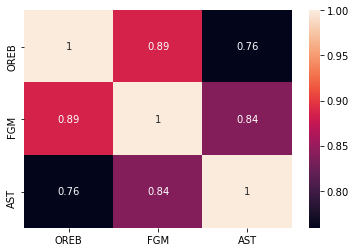

In [51]:
# Correlation between Offensive Rebounds, Field Goals Made and Assists 
# per season for players who played at least 70% of games

correlation = mj_df[["OREB", "FGM", "AST"]].corr()
sns.heatmap(correlation, annot=True)

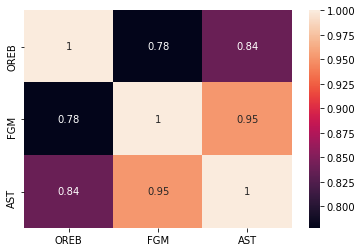

In [37]:
# Correlation between Offensive Rebounds, Field Goals Made and Assists 
# per season for players who played at least 70% of games

correlation = leauavg[["OREB", "FGM", "AST"]].corr()
sns.heatmap(correlation, annot=True)

In [38]:
# Correlation between Offensive Rebounds, Field Goals Made and Assists 
# per season for players who played at least 70% of games

correlation = leader_avg[["OREB", "FGM", "AST"]].corr()
sns.heatmap(correlation, annot=True)

In [42]:
# Correlation between Offensive Rebounds, Field Goals Made and Assists 
# per season for players who played at least 70% of games

correlation = best_avg[["REB", "FGM", "AST"]].corr()
sns.heatmap(correlation, annot=True)

In [ ]:
# # Convert to json
# totals_df.to_json(r'Plotly\data\nba_stats.json')